In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('/Users/zhenglongwu/Documents/GitHub/MSIN0006/Lab 1 Project/data_source/google_trends_manager/wizarding_world_search_data.csv', index_col=0)

Line plot

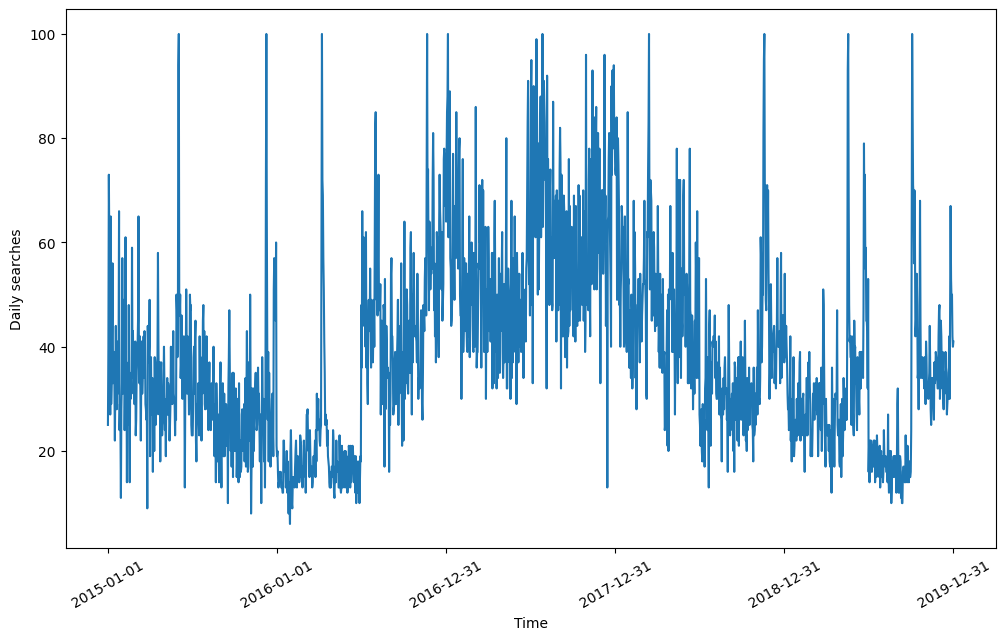

In [5]:
plt.figure(figsize=(12,7))
plt.plot(data.index, data['searches'])
plt.xticks(data.index, rotation=30)
plt.locator_params(axis='x', nbins=len(data.index)/365)
plt.ylabel('Daily searches')
plt.xlabel('Time')
plt.show()

Cumulative searches

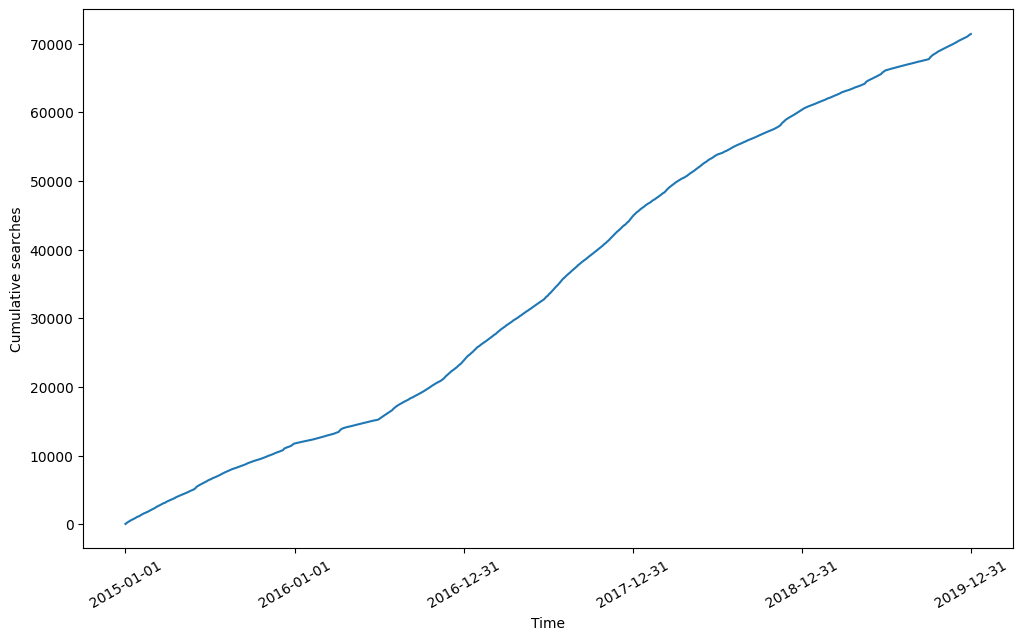

In [6]:
cumsum_df = data.copy()
cumsum_df['cumsum'] = cumsum_df['searches'].cumsum()

plt.figure(figsize=(12,7))
plt.plot(cumsum_df.index, cumsum_df['cumsum'])
plt.xticks(data.index, rotation=30)
plt.locator_params(axis='x', nbins=len(data.index)/365)
plt.ylabel('Cumulative searches')
plt.xlabel('Time')
plt.show()

Frequency filtered by day of week

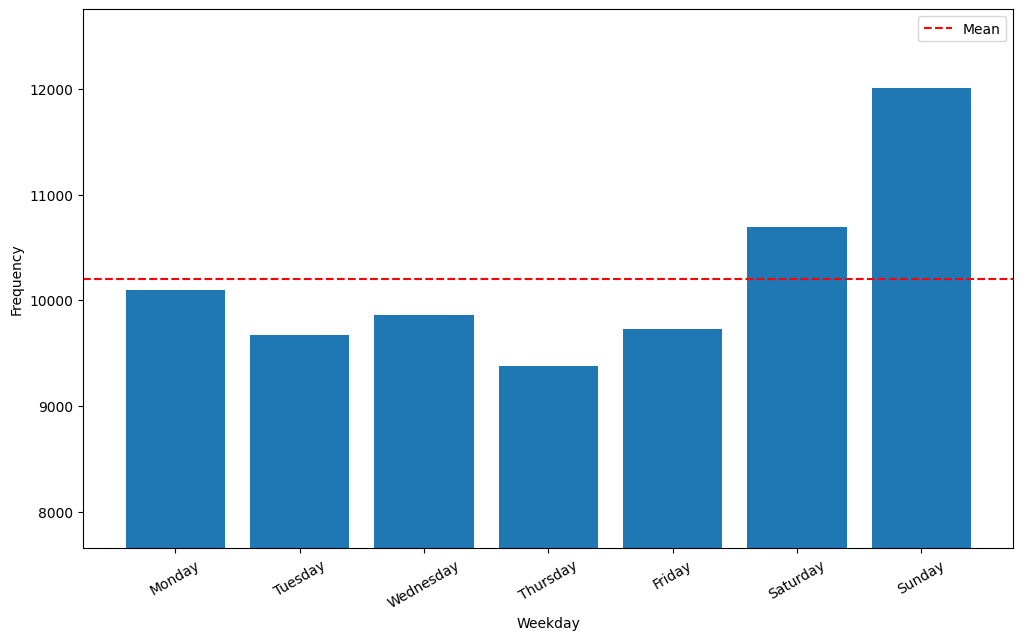

In [7]:
weekday_df = data.copy()
weekday_df['weekday'] = pd.to_datetime(weekday_df.index).weekday
weekdays = list(pd.to_datetime(weekday_df.index[:7].values).weekday)
weekdays.sort()
weekday_sum = [weekday_df[weekday_df['weekday'] == x]['searches'].sum() for x in weekdays]
days = {0:'Monday', 
        1:'Tuesday', 
        2:'Wednesday', 
        3:'Thursday', 
        4:'Friday', 
        5:'Saturday', 
        6:'Sunday'}

plt.figure(figsize=(12,7))
plt.bar([days[x] for x in weekdays], weekday_sum)
plt.ylim(np.mean(weekday_sum)*0.75, np.mean(weekday_sum)*1.25)
plt.xticks([days[x] for x in weekdays], rotation=30)
plt.xlabel('Weekday')
plt.ylabel('Frequency')
plt.axhline(sum(weekday_sum)/len(weekday_sum), 
            ls='--',
            color='red', 
            label='Mean')
plt.legend()
plt.show()

Frequency filtered by month

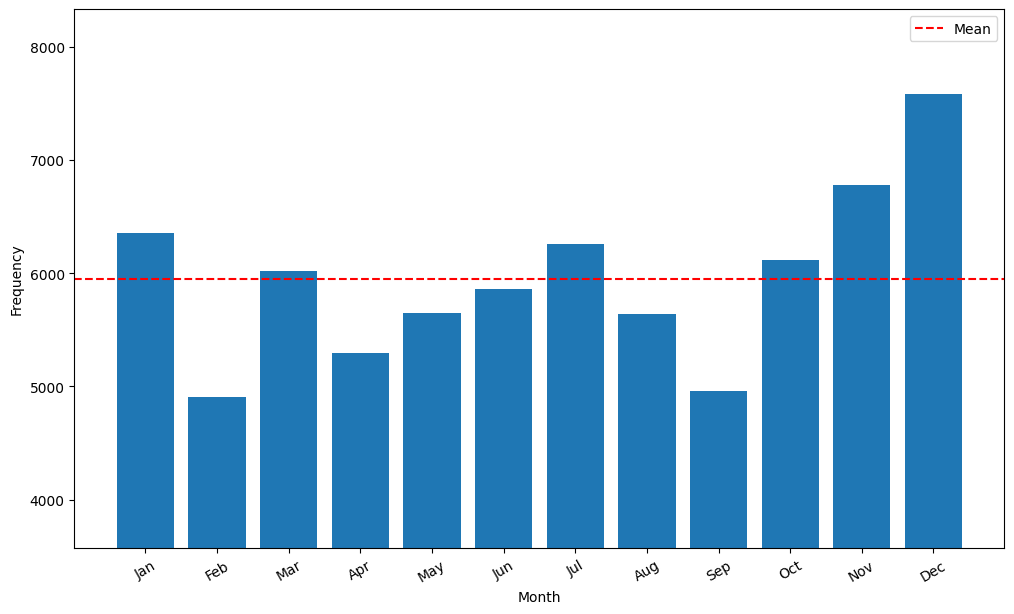

In [8]:
month_df = data.copy()
month_df['month'] = pd.to_datetime(month_df.index).month
months = list(pd.to_datetime(month_df.index.values).month.unique())
months.sort()
months_sum = [month_df[month_df['month'] == x]['searches'].sum() for x in months]
months_dict = {1:'Jan', 
               2:'Feb', 
               3:'Mar', 
               4:'Apr', 
               5:'May', 
               6:'Jun', 
               7:'Jul',
               8: 'Aug', 
               9: 'Sep',
               10: 'Oct',
               11: 'Nov', 
               12: 'Dec'}

plt.figure(figsize=(12,7))
plt.bar([months_dict[x] for x in months], months_sum)
plt.ylim(np.mean(months_sum)*0.6, np.mean(months_sum)*1.4)
plt.xticks([months_dict[x] for x in months], rotation=30)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.axhline(y=sum(months_sum)/len(months_sum), 
            ls='--',
            color='red', 
            label='Mean')
plt.legend()
plt.show()

Log change

By plotting standard deviation of log delta, we filter events that are outliers to day-to-day activity. Investigating trends and events around these outliers can be of use when considering external factors affecting our data.

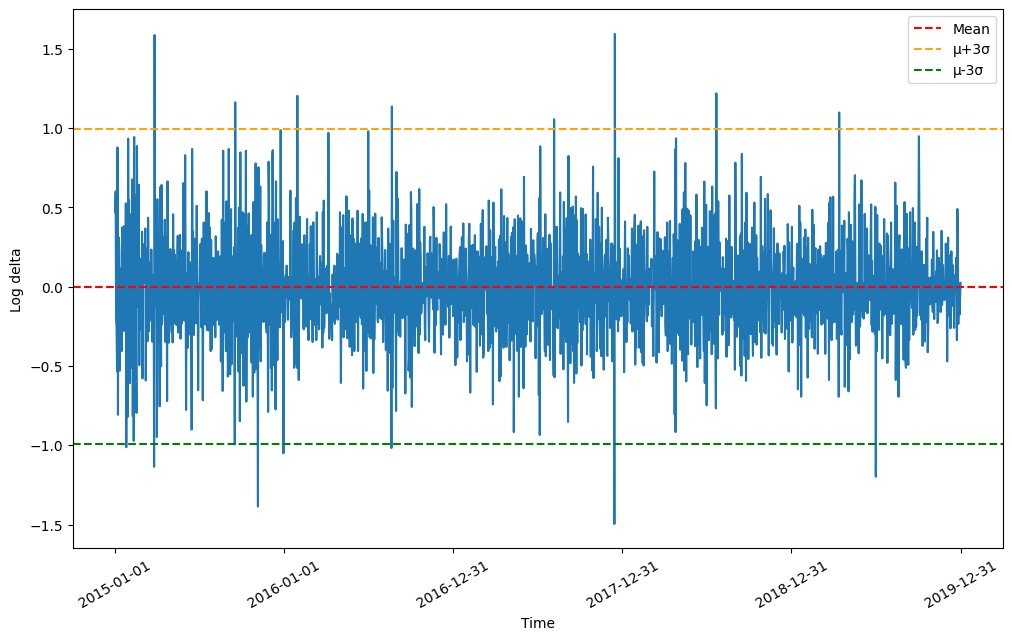

In [9]:
log_df = data.copy()
log_df['log_delta'] = np.log1p(log_df['searches'].pct_change())
plt.figure(figsize=(12,7))
plt.plot(log_df.index, log_df['log_delta'])
plt.xticks(data.index, rotation=30)
plt.locator_params(axis='x', nbins=len(data.index)/365)
plt.ylabel('Log delta')
plt.xlabel('Time')
plt.axhline(y=np.mean(log_df['log_delta']), 
            ls='--',
            color='red', 
            label='Mean')
plt.axhline(y=np.mean(log_df['log_delta'])+(3*np.std(log_df['log_delta'])), 
            ls='--',
            color='orange', 
            label='µ+3σ')
plt.axhline(y=np.mean(log_df['log_delta'])-(3*np.std(log_df['log_delta'])), 
            ls='--',
            color='green', 
            label='µ-3σ')
plt.legend()
plt.show()

In [20]:
three_sigma = np.mean(log_df['log_delta'])+(3*np.std(log_df['log_delta']))

outlier_dates = [index for index in log_df.index if log_df.loc[index, 'log_delta'] > three_sigma] 
outlier_dates

['2015-03-28',
 '2015-09-18',
 '2016-01-30',
 '2016-08-21',
 '2017-08-06',
 '2017-12-15',
 '2018-07-22',
 '2019-04-13']

0.8128261382402534


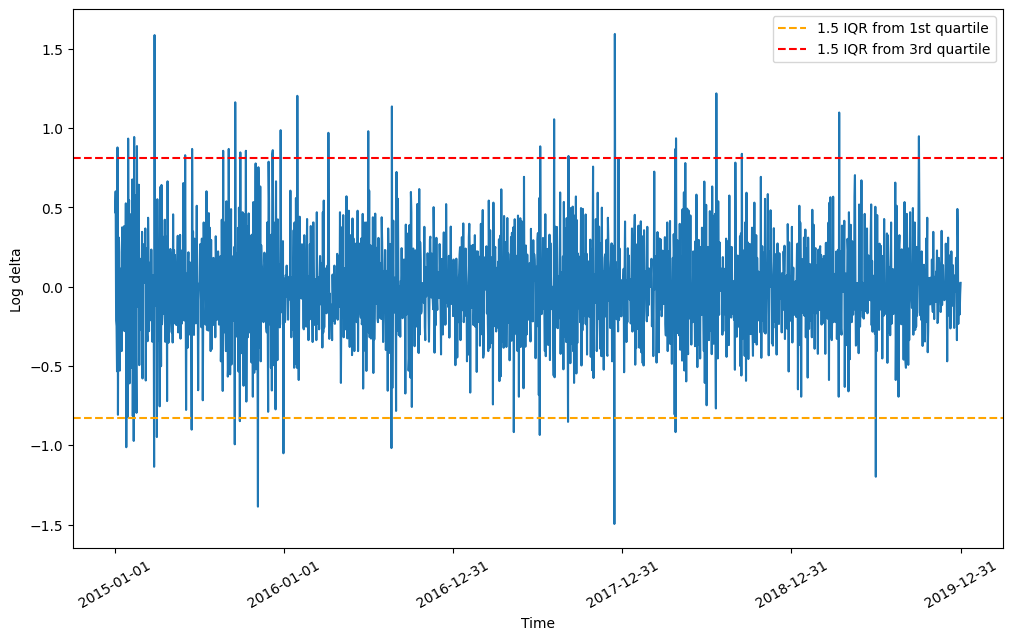

In [11]:
plt.figure(figsize=(12, 7))
plt.plot(log_df.index, log_df['log_delta'])
plt.xticks(data.index, rotation=30)
plt.locator_params(axis='x', nbins=len(data.index)/365)
plt.ylabel('Log delta')
plt.xlabel('Time')

stat = log_df['log_delta'].describe()
plt.axhline(y=stat['25%']-(1.5*(stat['75%']-stat['25%'])), 
            ls='--',
            color='orange', 
            label='1.5 IQR from 1st quartile')
plt.axhline(y=stat['75%']+(1.5*(stat['75%']-stat['25%'])), 
            ls='--',
            color='red', 
            label='1.5 IQR from 3rd quartile')
plt.legend()
plt.show()

In [17]:
third_quart = stat['75%']+(1.5*(stat['75%']-stat['25%']))

dates = [index for index in log_df.index if log_df.loc[index, 'log_delta'] > third_quart] 
dates

['2015-01-07',
 '2015-01-30',
 '2015-02-12',
 '2015-02-18',
 '2015-03-28',
 '2015-06-02',
 '2015-06-17',
 '2015-08-23',
 '2015-09-04',
 '2015-09-18',
 '2015-09-29',
 '2015-10-11',
 '2015-12-07',
 '2015-12-08',
 '2015-12-25',
 '2016-01-30',
 '2016-04-06',
 '2016-07-01',
 '2016-08-21',
 '2017-07-07',
 '2017-08-06',
 '2017-09-06',
 '2017-12-15',
 '2018-04-24',
 '2018-04-26',
 '2018-07-22',
 '2018-09-15',
 '2019-04-13',
 '2019-10-02']

Seasonalities

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_data = data.copy()
seasonal_data['date'] = pd.to_datetime(seasonal_data.index)
seasonal_data = seasonal_data.resample('M', on='date').sum()

# decompose_result_mult = seasonal_decompose(seasonal_data, model="multiplicative")
decompose_result_mult = seasonal_decompose(seasonal_data, model="additive")


trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();